In [1257]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import pytesseract
pytesseract.pytesseract.tesseract_cmd = 'C:/Program Files (x86)/Tesseract-OCR/tesseract.exe'
import LPR

In [1258]:
def plot_image(img, grayscale=True):
    plt.axis('off')
    if grayscale:
        plt.imshow(img, cmap='gray')
    else:
        plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.show()

In [1259]:
# 7, 11, 13 have 2 candidates for the license plate
idx = 24

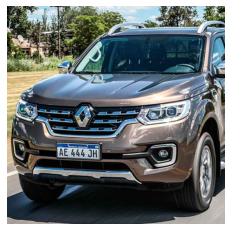

In [1260]:
lpr = LPR.LPR()
img = cv2.imread(f"./imgs/{idx:03}.png")
plot_image(img, False)

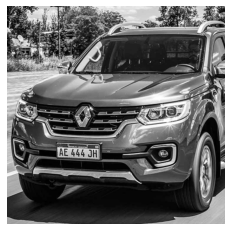

In [1261]:
gray = lpr.grayscale(img)
cv2.imwrite(f"./youtube/grayscale/{idx:03}.png", gray)
plot_image(gray)

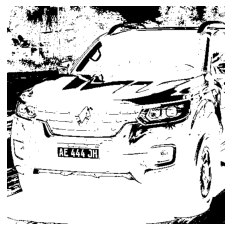

In [1262]:
thresh = lpr.apply_threshold(gray)
cv2.imwrite(f"./youtube/thresholds/{idx:03}.png", thresh)
plot_image(thresh)

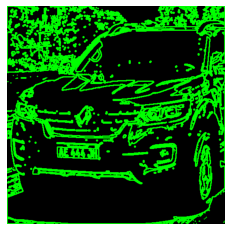

In [1263]:
contours = lpr.find_contours(thresh)
canvas = np.zeros_like(img)
cv2.drawContours(canvas , contours, -1, (0, 255, 0), 2)
cv2.imwrite(f"./youtube/contours/{idx:03}.png", canvas)
plt.axis('off')
plt.imshow(canvas);

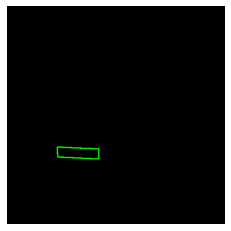

In [1264]:
candidates = lpr.filter_candidates(contours)
canvas = np.zeros_like(img)
cv2.drawContours(canvas , candidates, -1, (0, 255, 0), 2)
cv2.imwrite(f"./youtube/candidates/{idx:03}.png", canvas)
plt.axis('off')
plt.imshow(canvas);

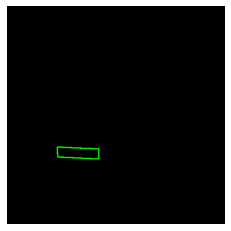

In [1265]:
license = lpr.get_lowest_candidate(candidates)
canvas = np.zeros_like(img)
cv2.drawContours(canvas , [license], -1, (0, 255, 0), 2)
cv2.imwrite(f"./youtube/plate_border/{idx:03}.png", canvas)
plt.axis('off')
plt.imshow(canvas);

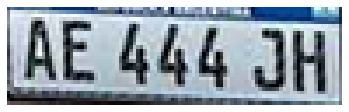

In [1266]:
cropped = lpr.crop_license_plate(gray, license)
cropped2 = lpr.crop_license_plate(img, license)
cv2.imwrite(f"./youtube/plates/{idx:03}.png", cropped2)
plot_image(cropped2, False)

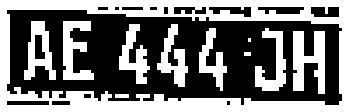

In [1267]:
thresh_cropped = lpr.apply_adaptive_threshold(cropped)
cv2.imwrite(f"./youtube/plate_threshold/{idx:03}.png", thresh_cropped)
plot_image(thresh_cropped)

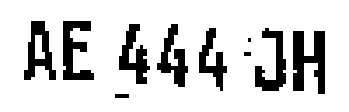

In [1268]:
clear_border = lpr.clear_border(thresh_cropped)
final = lpr.invert_image(clear_border)
cv2.imwrite(f"./youtube/finals/{idx:03}.png", final)
plot_image(final)

In [1269]:
psm = 7
alphanumeric = "ABCDEFGHIJKLMNOPQRSTUVWXYZ0123456789"
options = "-c tessedit_char_whitelist={}".format(alphanumeric)
options += " --psm {}".format(psm)
txt = pytesseract.image_to_string(final, config=options)
print(txt[:2], txt[2:5], txt[5:])

AE 444 JH



In [1270]:
# patentes = ["AD440CY", "AB397UK", "AD233LT", "AE182AY", "AE182AW",
#             "AE486WE", "AE796GG", "AD023DO", "AC883RA", "AC017TU",
#             "AC017TN", "AD440CY", "AA854LC", "AE497FZ", "AC017TR",
#             "AE622RT", "AD461GQ", "AA516IP", "AC724YO", "AE250FX",
#             "AE521RQ", "AC883RJ", "AE676WN", "AE410HE", "AE444JH"]
# for i in range(25):
#     img = cv2.imread(f"./imgs/{i:03}.png")
#     txt = lpr.read_license(img)
#     if txt[:-1] == patentes[i]:
#         print(f"{i:03} OK")
#     else:
#         print(f"{i:03} Original: {patentes[i][:2], patentes[i][2:5], patentes[i][5:]}",
#                  f"Reconocida: {txt[:2], txt[2:5], txt[5:-1]}")